<a href="https://colab.research.google.com/github/SMJ2003-pocketware/Data-Science/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the required libraries and dependencies**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

**Loadind the dataset**

In [ ]:
movie_data=pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")

**Getting information and description about the dataset**

In [ ]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


**Checking the number of missing values in each column**

In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


**Handling the missing values**

In [ ]:
#finding the mode of the year column
movie_data['Year'].mode()

,Year
0,(2019)


In [ ]:
#handling the missing value of the year column with its mode
movie_data['Year'].fillna(movie_data['Year'].mode()[0], inplace=True)
movie_data.isnull().sum()

<ipython-input-8-d7dcd1c4fa7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data['Year'].fillna(movie_data['Year'].mode()[0], inplace=True)


,0
Name,0
Year,0
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
print(movie_data.dtypes)

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [ ]:
movie_data.drop(columns='Duration', axis=1, inplace=True, errors='ignore')
movie_data.isnull().sum()

,0
Name,0
Year,0
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
#handling the missing value of the numerical columns with their mean
movie_data['Rating'].fillna(movie_data['Rating'].mean(), inplace=True)

<ipython-input-11-65564cd3473a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data['Rating'].fillna(movie_data['Rating'].mean(), inplace=True)


In [ ]:
movie_data.drop(columns='Votes', axis=1, inplace=True, errors='ignore')
movie_data.isnull().sum()

,0
Name,0
Year,0
Genre,1877
Rating,0
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
#handling the missing value of the categorical columns with "unknown"
movie_data['Genre'].fillna('Unknown', inplace=True)
movie_data['Director'].fillna('Unknown', inplace=True)
movie_data['Actor 1'].fillna('Unknown', inplace=True)
movie_data['Actor 2'].fillna('Unknown', inplace=True)
movie_data['Actor 3'].fillna('Unknown', inplace=True)

<ipython-input-13-244c9cbd818c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data['Genre'].fillna('Unknown', inplace=True)
<ipython-input-13-244c9cbd818c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
#after data handling checking again if all the missing values have been dealt with
movie_data.isnull().sum()

,0
Name,0
Year,0
Genre,0
Rating,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


**Visualization**

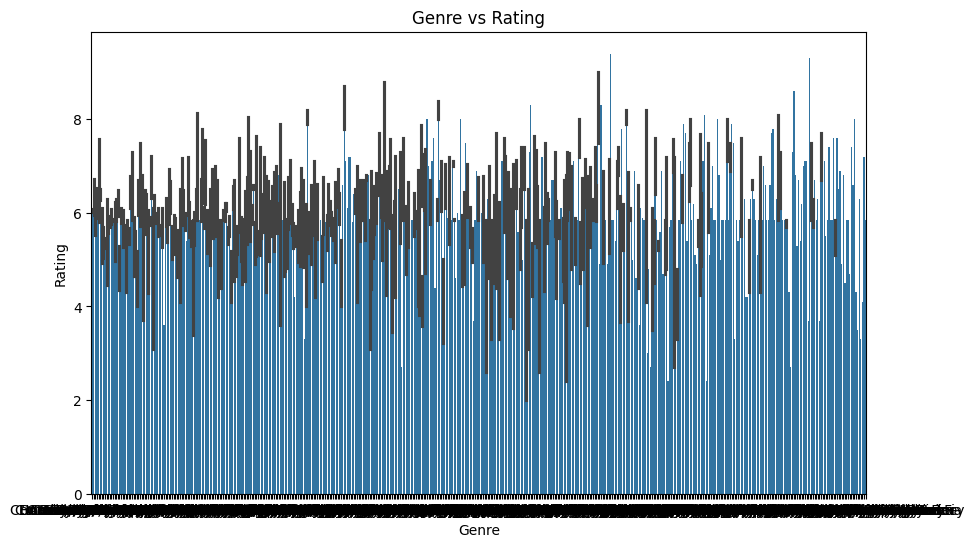

In [ ]:
#Genre vs Rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre',y='Rating',data=movie_data)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Genre vs Rating')
plt.show()

<ipython-input-16-11065718f7a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director',y='Rating',data=movie_data[movie_data['Director'].isin(top_directors)],errorbar=None ,palette='Set1')


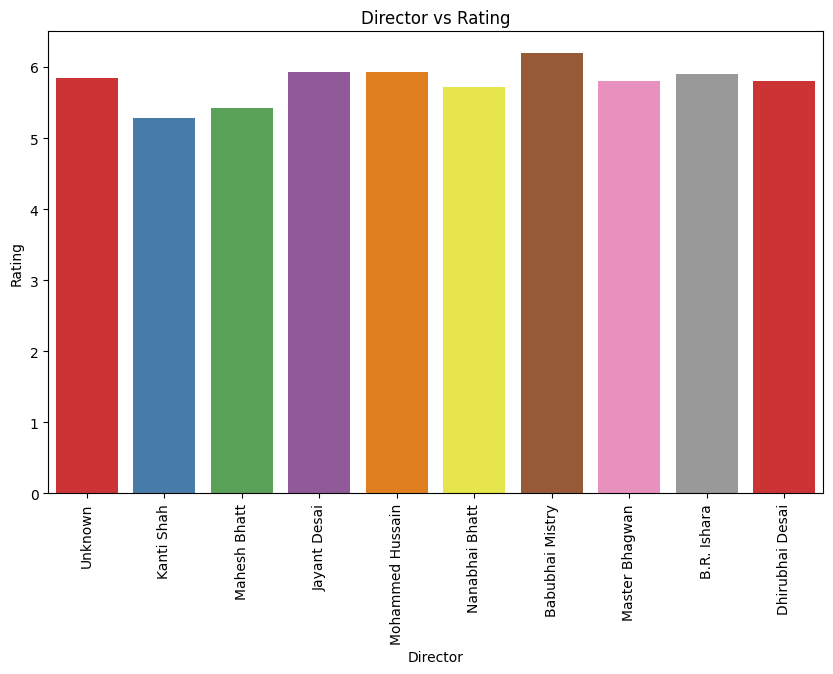

In [ ]:
# Director vs Rating
top_directors=movie_data['Director'].value_counts().index[:10]
plt.figure(figsize=(10,6))
sns.barplot(x='Director',y='Rating',data=movie_data[movie_data['Director'].isin(top_directors)],errorbar=None ,palette='Set1')
plt.title('Director vs Rating')
plt.xticks(rotation=90)
plt.show()

<ipython-input-17-4202c2e4ed04>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Actor 1', y='Rating', data=movie_data[movie_data['Actor 1'].isin(top_actors)],errorbar=None ,palette='Set2')


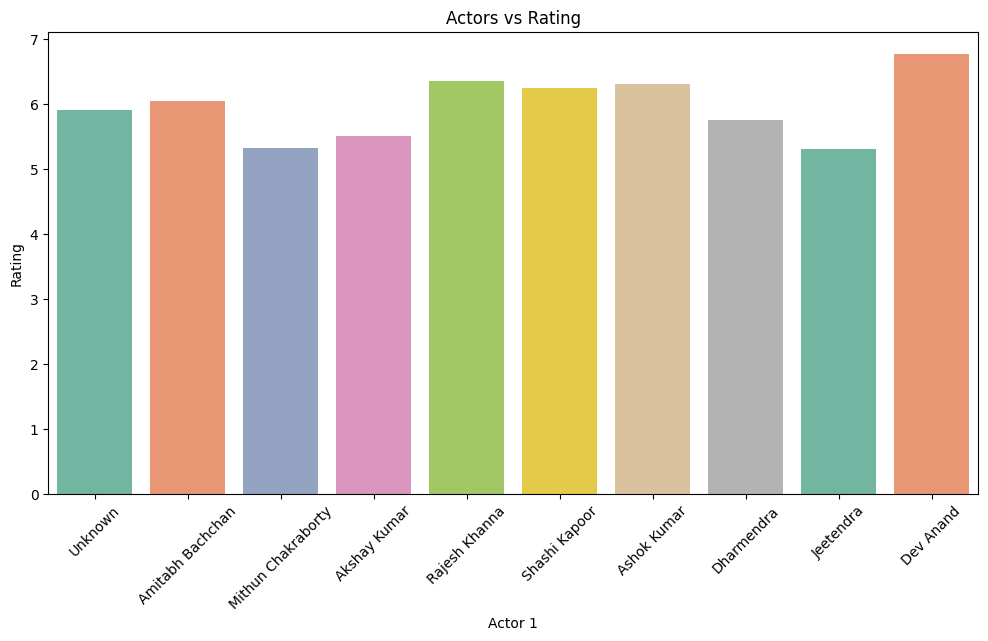

In [ ]:
#Actors vs Rating
top_actors=movie_data['Actor 1'].value_counts().index[:10]
plt.figure(figsize=(12,6))
sns.barplot(x='Actor 1', y='Rating', data=movie_data[movie_data['Actor 1'].isin(top_actors)],errorbar=None ,palette='Set2')
plt.title('Actors vs Rating')
plt.xticks(rotation=45)
plt.show()

**Encoding the categorical columns**

In [ ]:
le=LabelEncoder()

In [ ]:
movie_data['Genre']=le.fit_transform(movie_data['Genre'])
movie_data['Director']=le.fit_transform(movie_data['Director'])
movie_data['Actor 1']=le.fit_transform(movie_data['Actor 1'])
movie_data['Actor 2']=le.fit_transform(movie_data['Actor 2'])
movie_data['Actor 3']=le.fit_transform(movie_data['Actor 3'])

**Splitting data and Model Building**

In [ ]:
features=['Genre','Director','Actor 1','Actor 2','Actor 3']
X=movie_data[features]
y=movie_data['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Reducing the size of the dataset for faster computation**

In [ ]:
small_X_train=X_train.sample(frac=0.1,random_state=42)
small_y_train=y_train.loc[small_X_train.index]

In [ ]:
print(small_X_train.dtypes)

Genre       int64
Director    int64
Actor 1     int64
Actor 2     int64
Actor 3     int64
dtype: object


**Model Building**

In [ ]:
model=RandomForestRegressor(random_state=42)
model.fit(small_X_train,small_y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Predicting and evalutaing
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 1.0088127717365285
